In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [59]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset',
    label_mode='categorical',
    image_size=(224,224),
    batch_size=32,
    shuffle=True
)
class_names = sorted(os.listdir('dataset'))
num_classes = len(class_names)

Found 400 files belonging to 4 classes.


In [60]:
# 2. Split into train and validation sets
train_size = int(0.8 * tf.data.experimental.cardinality(dataset).numpy())

train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size)

In [61]:

resnet_base = tf.keras.applications.ResNet50(
    input_shape=(224,224,3),
    include_top = False,
    weights='imagenet'
)
resnet_base.trainable = False

In [62]:
from tensorflow.keras import layers, models

model = models.Sequential([
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [63]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
            metrics=['accuracy'])


In [64]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 553ms/step - accuracy: 0.5417 - loss: 1.3053 - val_accuracy: 0.9250 - val_loss: 0.1821
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 493ms/step - accuracy: 0.8022 - loss: 0.4884 - val_accuracy: 0.8500 - val_loss: 0.3252
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 502ms/step - accuracy: 0.8844 - loss: 0.2671 - val_accuracy: 0.9625 - val_loss: 0.1365
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 487ms/step - accuracy: 0.9345 - loss: 0.2013 - val_accuracy: 0.9625 - val_loss: 0.0925
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 502ms/step - accuracy: 0.9472 - loss: 0.1289 - val_accuracy: 0.9875 - val_loss: 0.0646


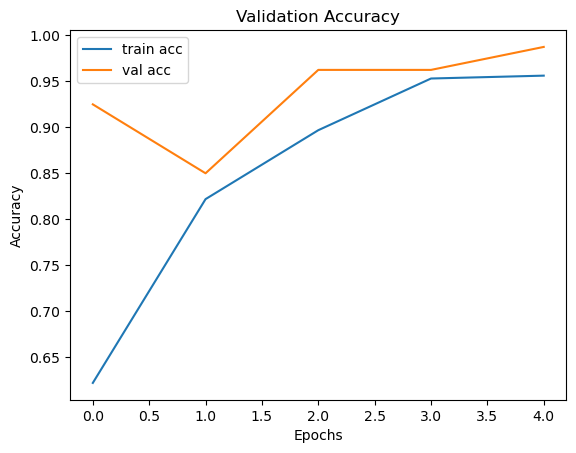

In [65]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


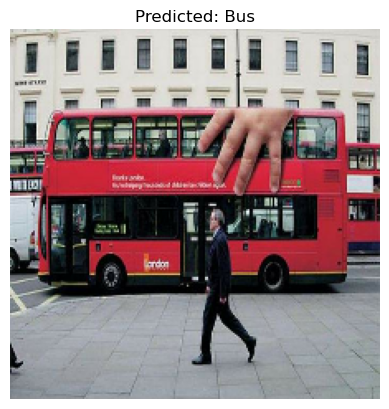

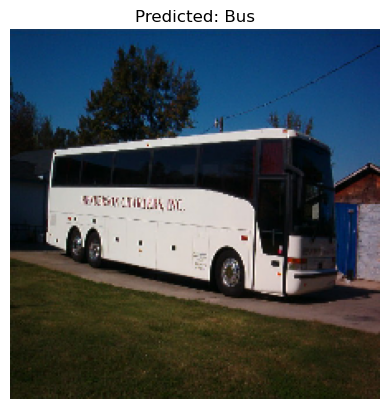

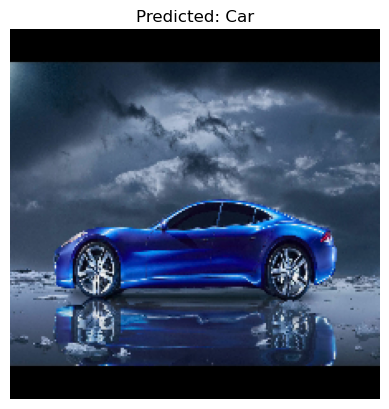

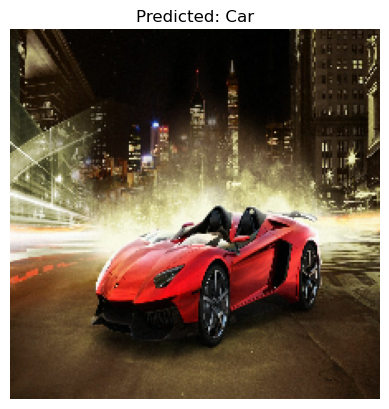

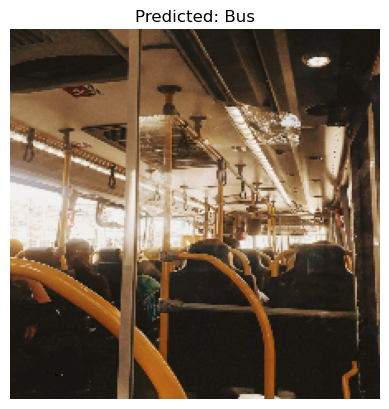

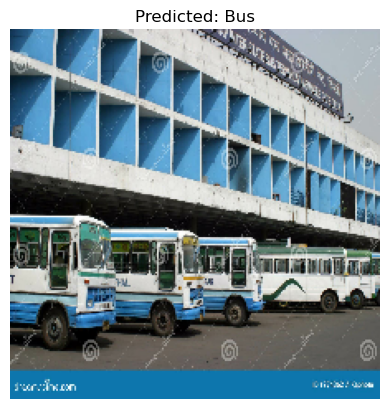

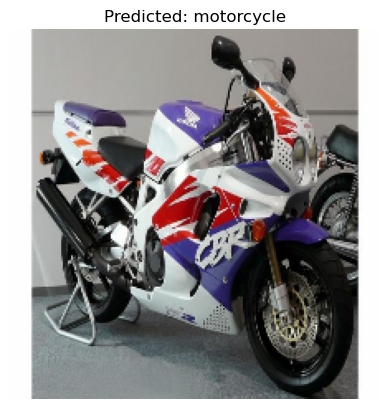

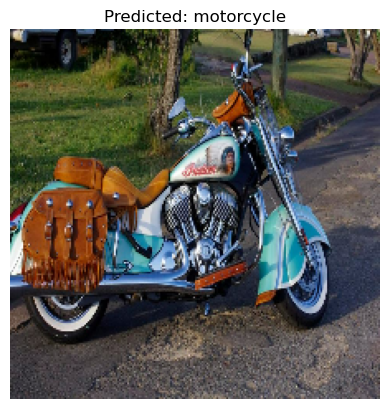

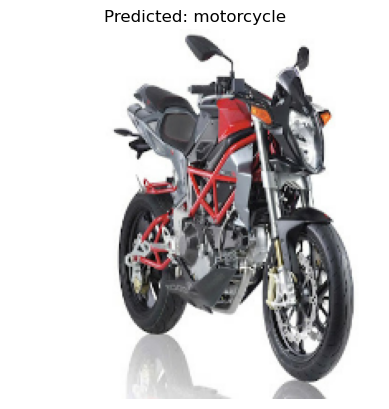

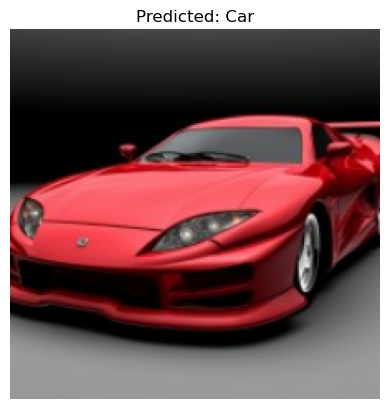

2025-06-29 15:49:05.885544: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [66]:
for images, labels in val_ds.take(1):
    preds = model.predict(images)  # or resnet_model
    for i in range(10):
        plt.imshow(images[i].numpy().astype("uint8"))
        pred_label = class_names[tf.argmax(preds[i])]
        plt.title(f"Predicted: {pred_label}")
        plt.axis("off")
        plt.show()


In [73]:
from tensorflow.keras.utils import img_to_array
from tensorflow.image import resize
import tensorflow as tf

img = Image.open("./dataset/car/Image_4.jpg").convert("RGB")
img = img.resize((224, 224))  
img_array = img_to_array(img) / 255.0 
img_array = np.expand_dims(img_array, axis=0)

img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)

pred = model.predict(img_array)
print("Probabilities:", pred)
print("Predicted:", class_names[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Probabilities: [[0.04502945 0.8408495  0.09900143 0.0151196 ]]
Predicted: Car


In [74]:
model.save('model.h5')

In [75]:
import pickle
with open("class_names.pkl", "wb") as f:
    pickle.dump(class_names, f)